In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n1 = np.random.randn(1000, 1)
n2 = 5 + np.random.randn(1000, 1)
n3 = 0.2 * np.random.randn(1000, 1)

print("mean", np.mean(n1))
print("mean", np.std(n1))


mean 0.033012311268667625
mean 0.9976796283914889


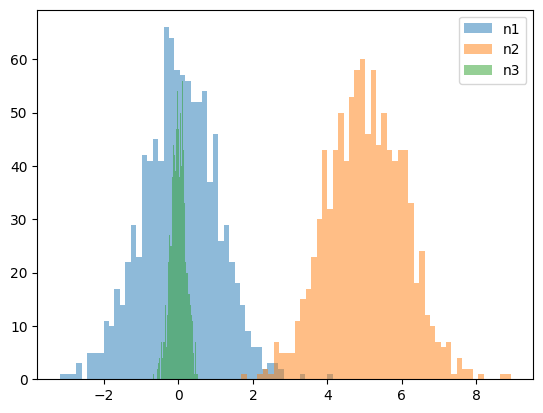

In [4]:
plt.hist(n1, bins=50, alpha=0.5, label='n1')
plt.hist(n2, bins=50, alpha=0.5, label='n2')
plt.hist(n3, bins=50, alpha=0.5, label='n3')
plt.legend(loc='upper right')

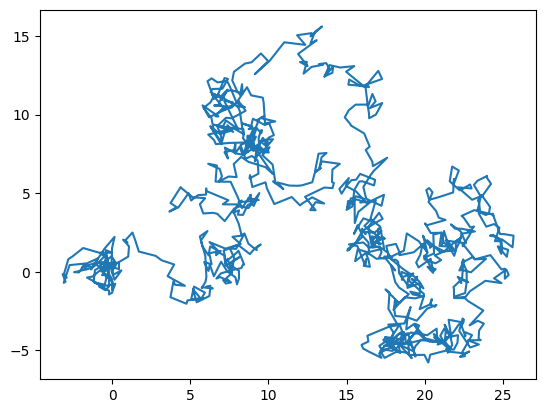

In [5]:
def brownianModel():
    x = np.zeros([1000, 1])
    y = np.zeros([1000, 1])

    nx = 0.5 * np.random.randn(1000, 1)
    ny = 0.5 * np.random.randn(1000, 1)

    for i in range(1, 1000):
        x[i] = x[i-1] + nx[i]
        y[i] = y[i-1] + ny[i]

    return x, y

x, y = brownianModel()
plt.plot(x, y)


(-8.286737176919306,
 155.80443374655758,
 -58.49407305687118,
 2.8195862286447926)

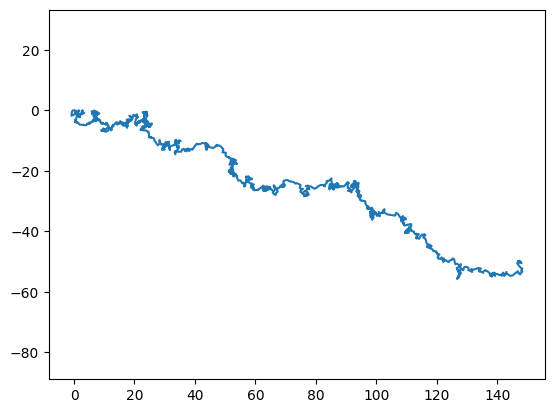

In [7]:
def cvModel():
    dt = 0.033

    x = np.zeros([1000, 1]); # x position
    vx = np.zeros([1000, 1]); # x velocity
    y = np.zeros([1000, 1]); # y position
    vy = np.zeros([1000, 1]); # y velocity

    # noise vectors
    nx = 0.5 * np.random.randn(1000, 1);
    nvx = 0.1 * np.random.randn(1000, 1);
    ny = 0.5 * np.random.randn(1000, 1);
    nvy = 0.1 * np.random.randn(1000, 1);

    # generate trajectory
    for i in range(1,1000):
        x[i] = x[i-1] + vx[i-1]*dt + nx[i];
        vx[i] = vx[i-1] + nvx[i];
        y[i] = y[i-1] + vy[i-1]*dt + ny[i];
        vy[i] = vy[i-1] + nvy[i];
    
    return x, y

x, y = cvModel()
plt.plot(x, y)
plt.axis('equal')


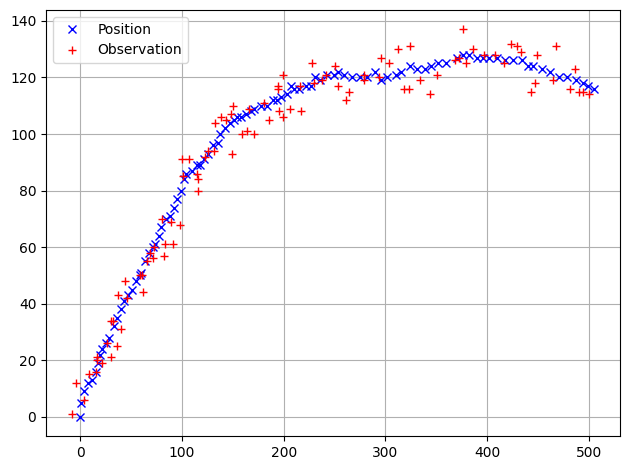

In [17]:
def load_var(name):
    val = []
    with open(name+".csv", "r") as fd:
        val = [float(x) for x in fd.read().strip().split(",")]
    return np.array(val)

u = load_var("u")
v = load_var("v")
xp = load_var("xp")
yp = load_var("yp")

plt.plot(xp, yp, "bx", label="Position")
plt.plot(u, v, "r+", label="Observation")
# plt.axis('equal')
plt.tight_layout()
plt.grid()
plt.legend()



mean_u 0.11
mean_v -0.66
std_u 4.835069803012155
std_v 5.012424563023368


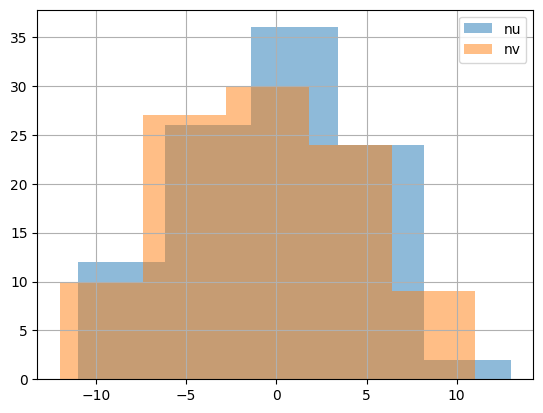

In [22]:
nu = u - xp
nv = v - yp
mean_u = np.mean(nu)
mean_v = np.mean(nv)
std_u = np.std(nu)
std_v = np.std(nv)

print("mean_u", mean_u)
print("mean_v", mean_v)
print("std_u", std_u)
print("std_v", std_v)

plt.hist(nu, bins=5, alpha=0.5, label='nu')
plt.hist(nv, bins=5, alpha=0.5, label='nv')

plt.legend(loc='upper right')
plt.grid()